In [1]:
from pyspark.sql import functions as F

from IPython.display import Markdown, display
def printmd(string, color=None):
    string = '**' + string.replace('_',' ').title() + '**'
    display(Markdown(string))

import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

In [2]:
df = spark.read.parquet('./dataset/refined_feature_dataset.parquet')

In [3]:
(df.count(),len(df.columns))

(13776051, 18)

In [4]:
df.show(1,vertical=True,truncate=False)

-RECORD 0---------------------------------------------------------
 user_session              | eddf5cd0-c926-4920-a5b4-b2a65b7779b7 
 event_time_first          | 2019-11-17 08:29:09                  
 event_time_last           | 2019-11-17 08:43:58                  
 duration                  | 889                                  
 num_distinct_category     | 1                                    
 num_distinct_cart_cat     | 0.0                                  
 num_distinct_cart_product | 0.0                                  
 c_cart                    | 0                                    
 c_purchase                | 0                                    
 c_view                    | 6                                    
 r_cart                    | 0.0                                  
 r_purchase                | 0.0                                  
 r_view                    | 1979.62                              
 mean_cart                 | 0.0                              

In [5]:
df = df.withColumn('click_rate',F.round(60*F.col('c_view')/F.col('duration'),2))

In [6]:
df.show(1,vertical=True,truncate=False)

-RECORD 0---------------------------------------------------------
 user_session              | eddf5cd0-c926-4920-a5b4-b2a65b7779b7 
 event_time_first          | 2019-11-17 08:29:09                  
 event_time_last           | 2019-11-17 08:43:58                  
 duration                  | 889                                  
 num_distinct_category     | 1                                    
 num_distinct_cart_cat     | 0.0                                  
 num_distinct_cart_product | 0.0                                  
 c_cart                    | 0                                    
 c_purchase                | 0                                    
 c_view                    | 6                                    
 r_cart                    | 0.0                                  
 r_purchase                | 0.0                                  
 r_view                    | 1979.62                              
 mean_cart                 | 0.0                              

In [7]:
df.createOrReplaceTempView('session_insight')

In [8]:
sql_script = \
"""
    SELECT *
    FROM session_insight
    LIMIT 5
    ;
"""

spark.sql(sql_script).toPandas()


,user_session,event_time_first,event_time_last,duration,num_distinct_category,num_distinct_cart_cat,num_distinct_cart_product,c_cart,c_purchase,c_view,r_cart,r_purchase,r_view,mean_cart,mean_purchase,mean_view,hour,day_name,click_rate
0,eddf5cd0-c926-4920-a5b4-b2a65b7779b7,2019-11-17 08:29:09,2019-11-17 08:43:58,889,1,0.0,0.0,0,0,6,0.00,0.00,1979.62,0.00,0.00,329.94,8,Sun,0.40
1,5c1e2dcb-f090-4014-b5f2-77db180404e5,2019-11-17 08:33:04,2019-11-17 09:21:00,2876,1,0.0,0.0,0,0,34,0.00,0.00,4041.57,0.00,0.00,118.87,8,Sun,0.71
2,50125c8f-d912-46ec-9a17-f83024bd0973,2019-11-17 08:39:32,2019-11-17 08:44:22,290,1,0.0,0.0,0,0,6,0.00,0.00,6833.57,0.00,0.00,1138.93,8,Sun,1.24
3,330ca4bd-02d9-4f70-b956-2a2e225fef6a,2019-11-17 08:31:36,2019-11-17 08:49:27,1071,1,1.0,1.0,2,1,9,334.58,167.29,1389.78,167.29,167.29,154.42,8,Sun,0.50
4,bee47dc9-2b95-4949-873d-22b810b1c5bd,2019-11-17 08:39:11,2019-11-17 08:43:07,236,1,0.0,0.0,0,0,4,0.00,0.00,4375.09,0.00,0.00,1093.77,8,Sun,1.02


/home/tungle/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


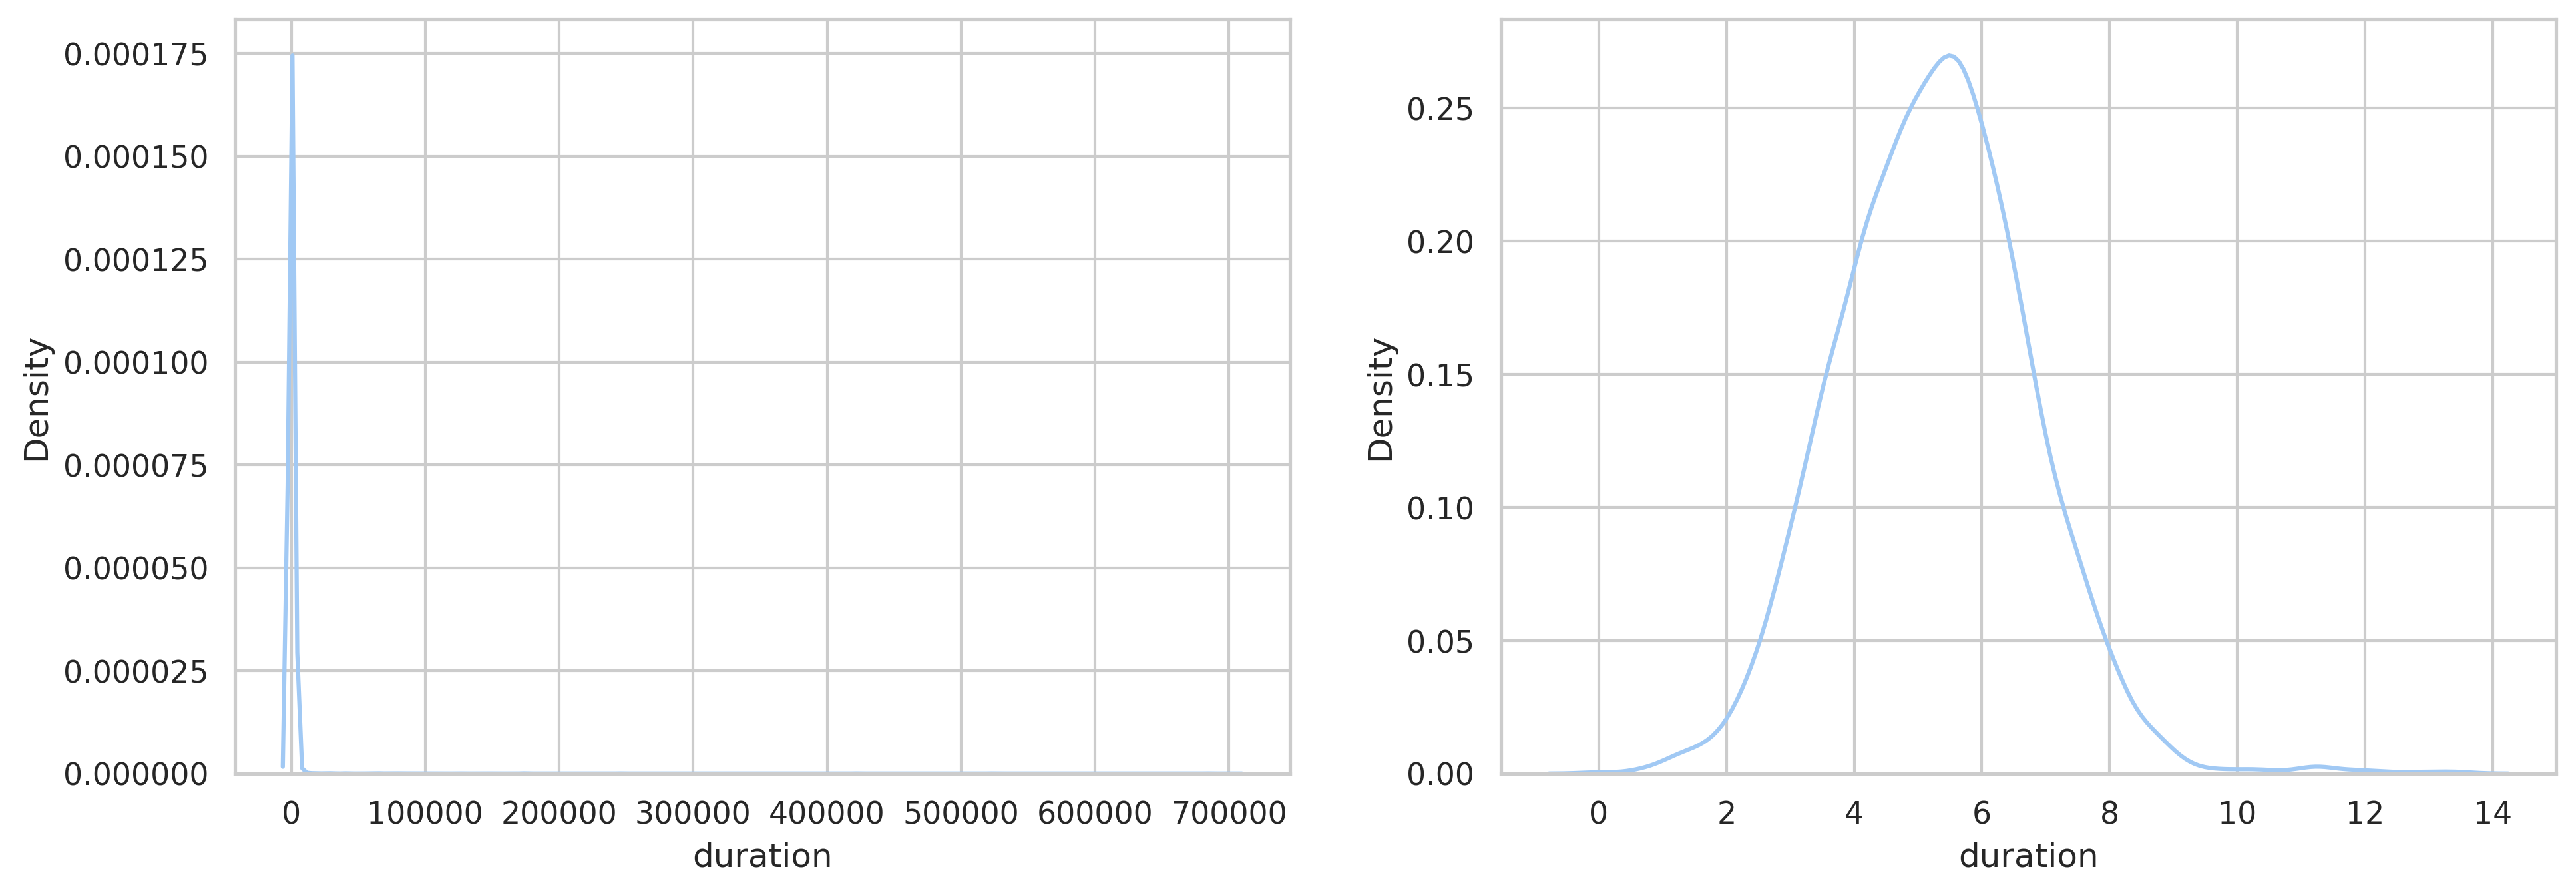

In [9]:
sql_script = \
"""
    SELECT duration 
    FROM session_insight
    ORDER BY RAND()
    LIMIT 10000
"""

duration = spark.sql(sql_script).toPandas()

plt.figure(figsize=(15,5), dpi=300)

plt.subplot(1,2,1)
sns.kdeplot(duration['duration'])

plt.subplot(1,2,2)
sns.kdeplot(np.log(duration['duration']))

plt.show()

del duration

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
hour,0.0,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00,22.00,23.00
total_event,89963.0,176996.00,359066.00,529137.00,688681.00,770872.00,800942.00,810677.00,848087.00,831864.00,...,885398.00,866011.00,803697.00,733013.00,531113.00,362914.00,214493.00,122506.00,74609.00,56783.00
conversion_rate,0.6,0.52,0.68,1.19,1.44,1.56,1.63,1.65,1.81,1.94,...,1.35,1.14,1.02,0.97,0.73,0.72,0.74,0.82,0.91,0.84


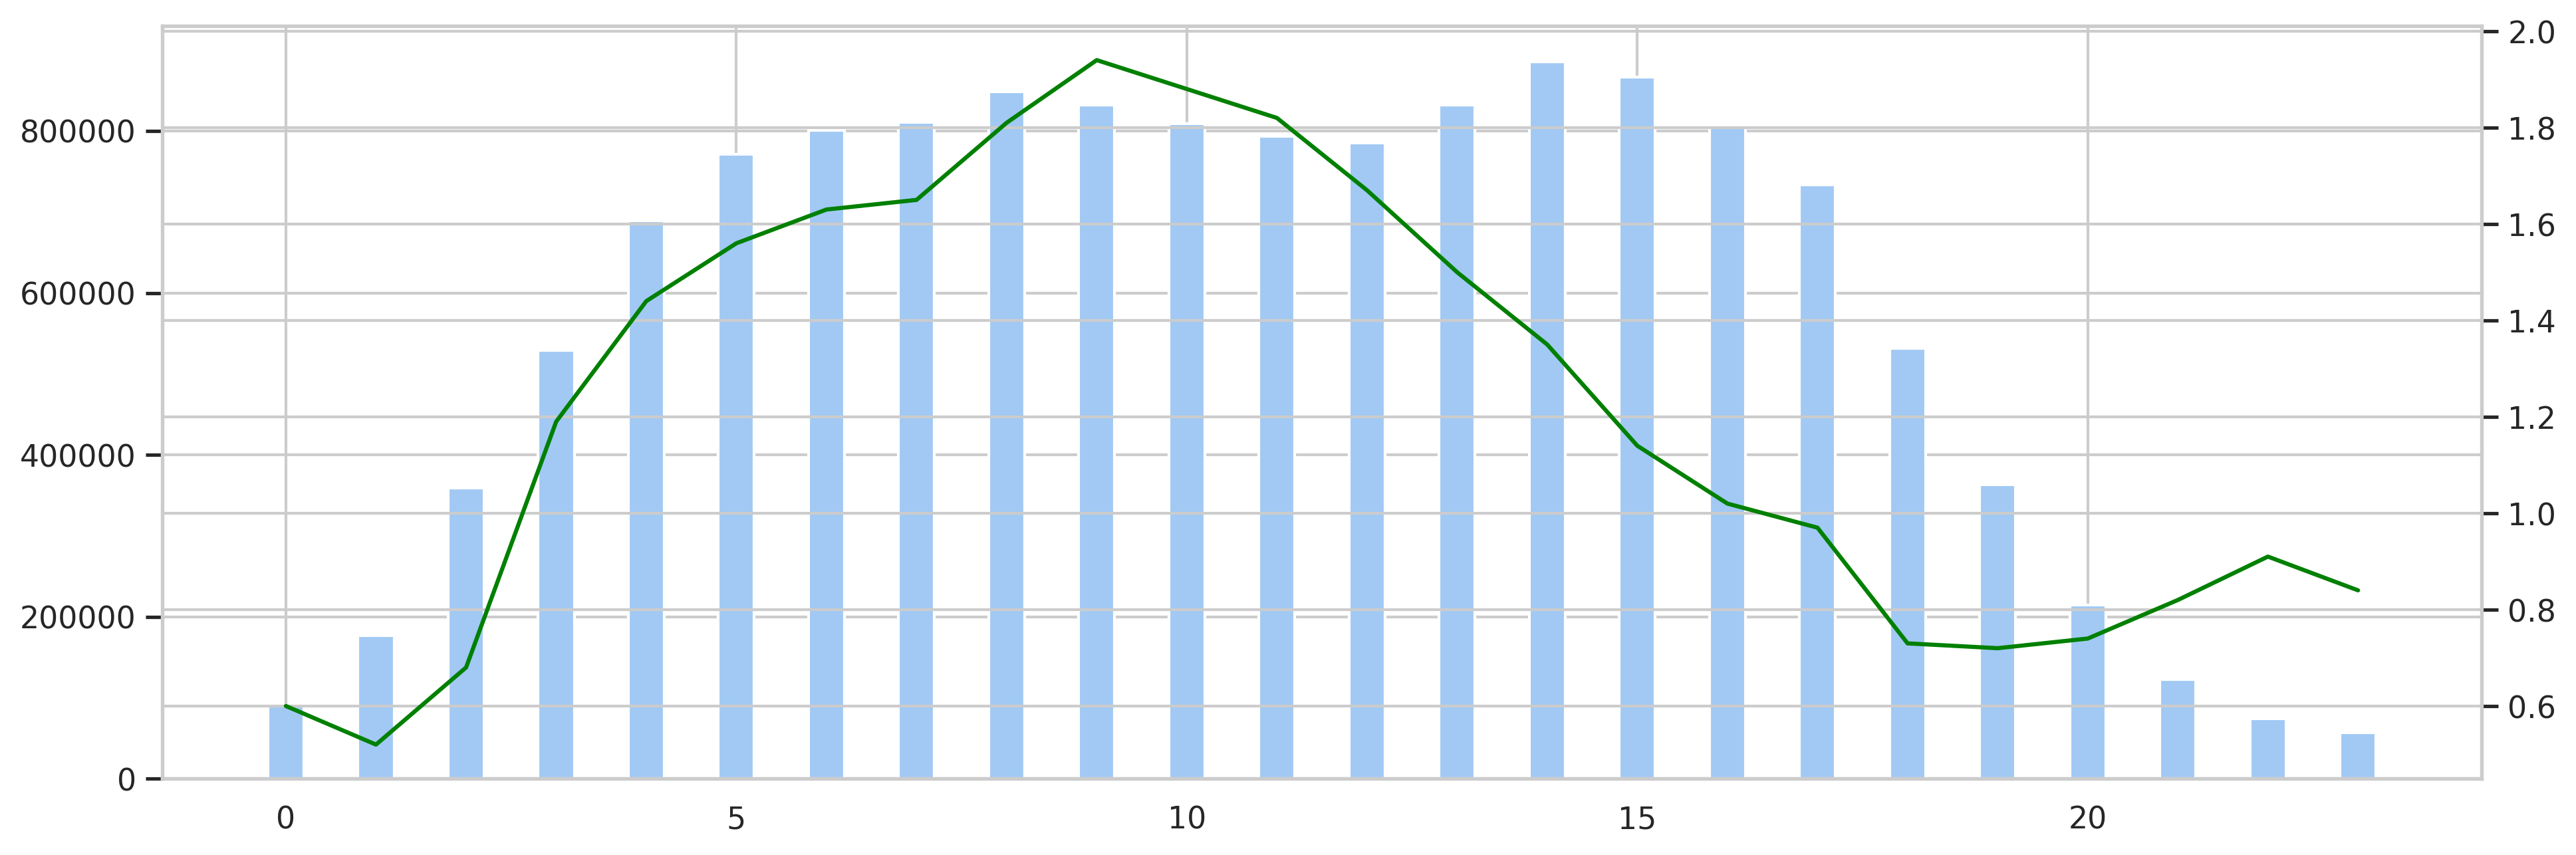

In [10]:

sql_script = \
"""
    SELECT 
        hour,
        COUNT(hour) AS total_event,
        ROUND(100*SUM(c_purchase)/(SUM(c_purchase)+SUM(c_cart)+SUM(c_view)),2) AS conversion_rate
    FROM session_insight
    GROUP BY hour
    ORDER BY hour
"""

hour = spark.sql(sql_script).toPandas()
display(hour.T)

X = hour.hour.values.tolist()
total_event = hour.total_event.values.tolist()
conversion_rate = hour.conversion_rate.values.tolist()

fig, ax1 = plt.subplots(figsize=(15,5), dpi=300)
ax2 = ax1.twinx()

X_axis = np.arange(len(X))
ax1.bar(X_axis, total_event, 0.4, label = 'total_event')
ax2.plot(conversion_rate, color='green')


plt.xticks(rotation=90)
plt.show()

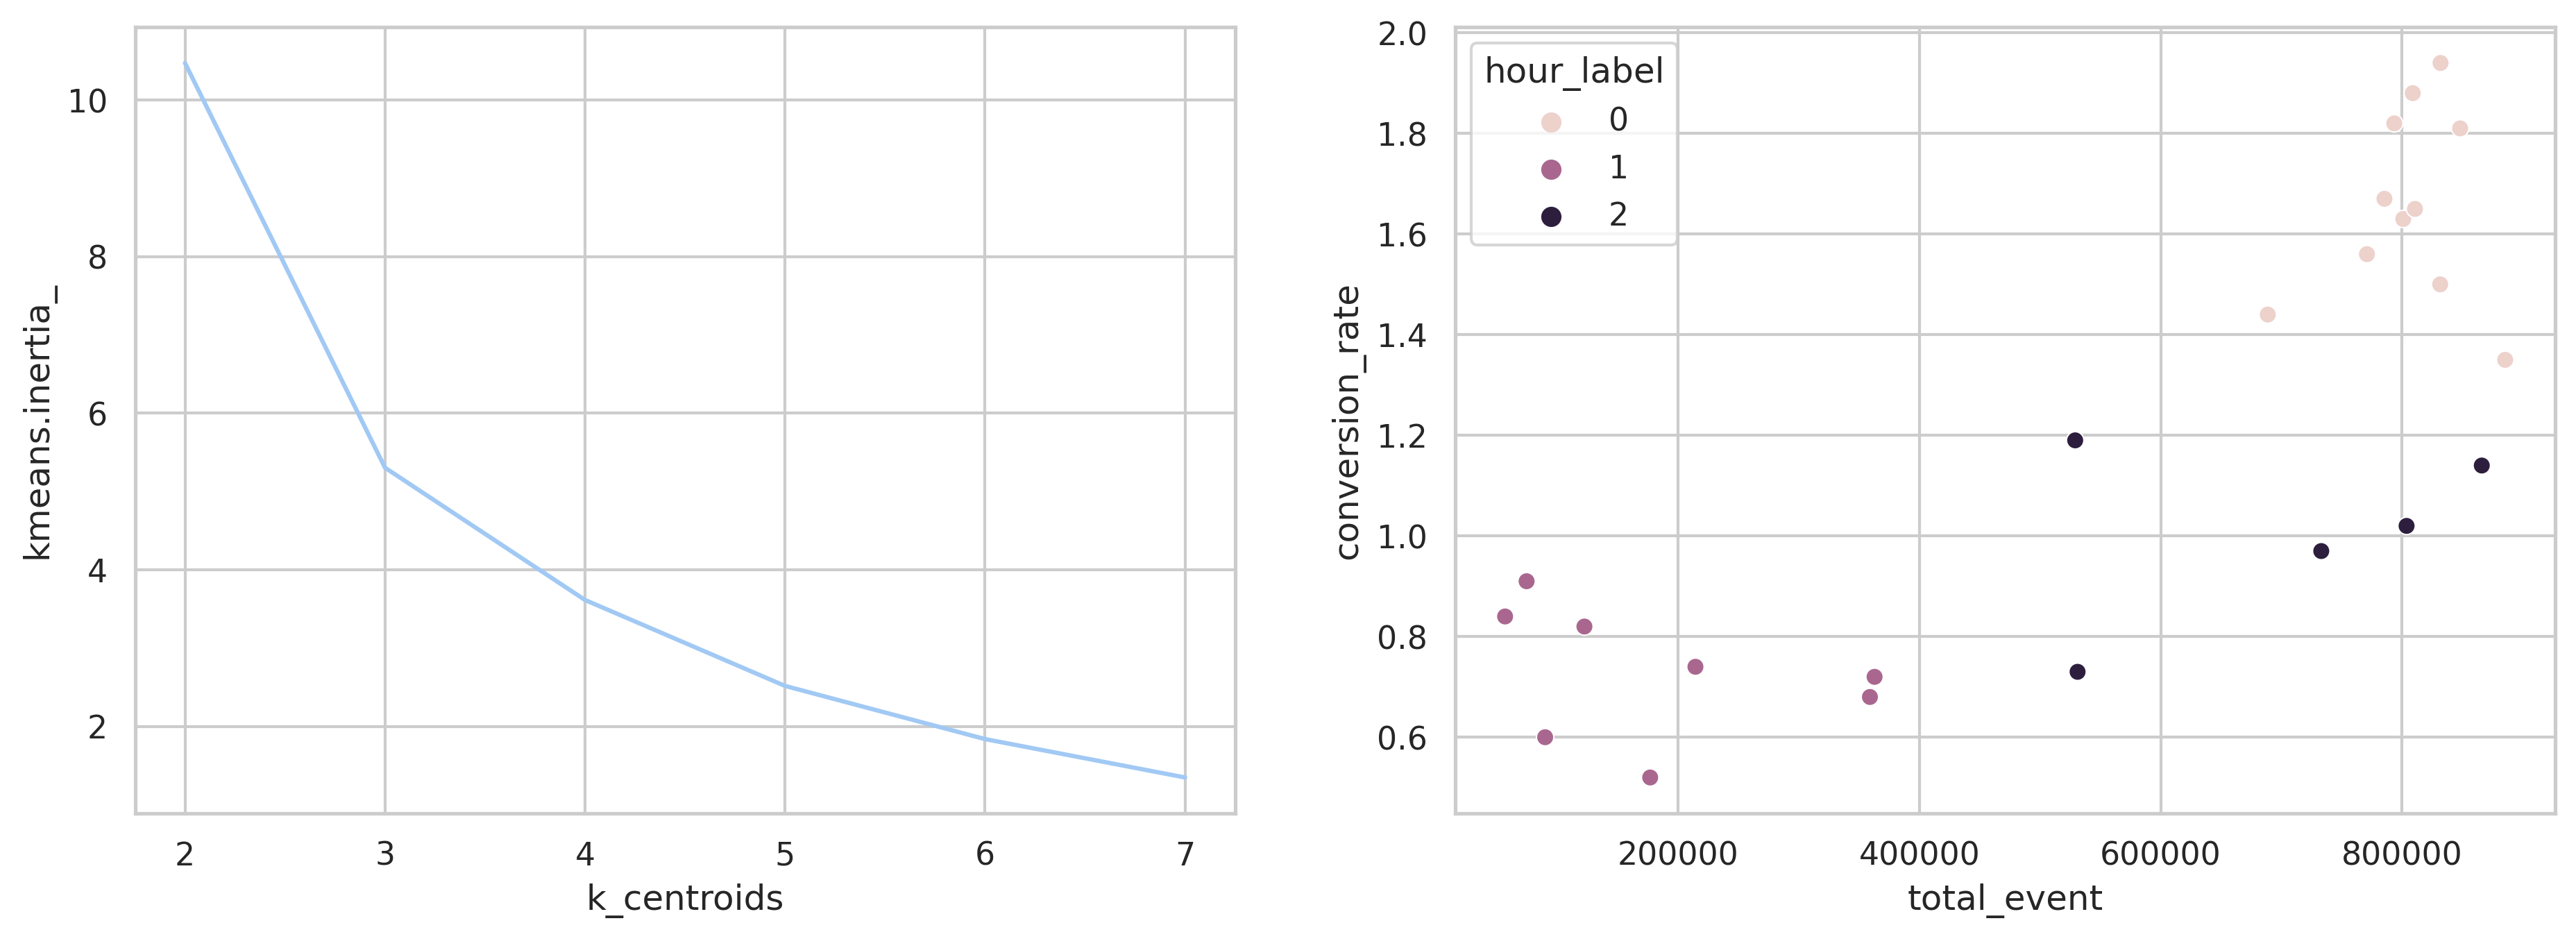

,hour,total_event,conversion_rate,hour_label
0,0,89963,0.60,1
1,1,176996,0.52,1
2,2,359066,0.68,1
3,3,529137,1.19,2
4,4,688681,1.44,0
5,5,770872,1.56,0
6,6,800942,1.63,0
7,7,810677,1.65,0
8,8,848087,1.81,0
9,9,831864,1.94,0


In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def distortions(X,n = 2):
    X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
    kmeans = KMeans(n_clusters = n, n_init = 10, random_state=0)
    kmeans.fit(X_scaled)
    distortions= kmeans.inertia_
    return distortions

k_centroids = [k for k in range(2,8)]
elbow = []
for k in k_centroids:
    elbow.append(distortions(hour[['total_event','conversion_rate']],k))

    
plt.figure(figsize=(15,5), dpi=300)
plt.subplot(1,2,1)
plt.plot(k_centroids,elbow)
plt.xlabel("k_centroids")
plt.ylabel("kmeans.inertia_")

def k_means(X,n = 2):
    X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
    kmeans = KMeans(n_clusters = n, n_init = 10, random_state=0)
    kmeans.fit(X_scaled)
    return kmeans.predict(X_scaled)

hour['hour_label'] = k_means(hour[['total_event','conversion_rate']],n = 3)
plt.subplot(1,2,2)
sns.scatterplot(x=hour.total_event,y=hour.conversion_rate, hue = hour.hour_label)
plt.show()
hour

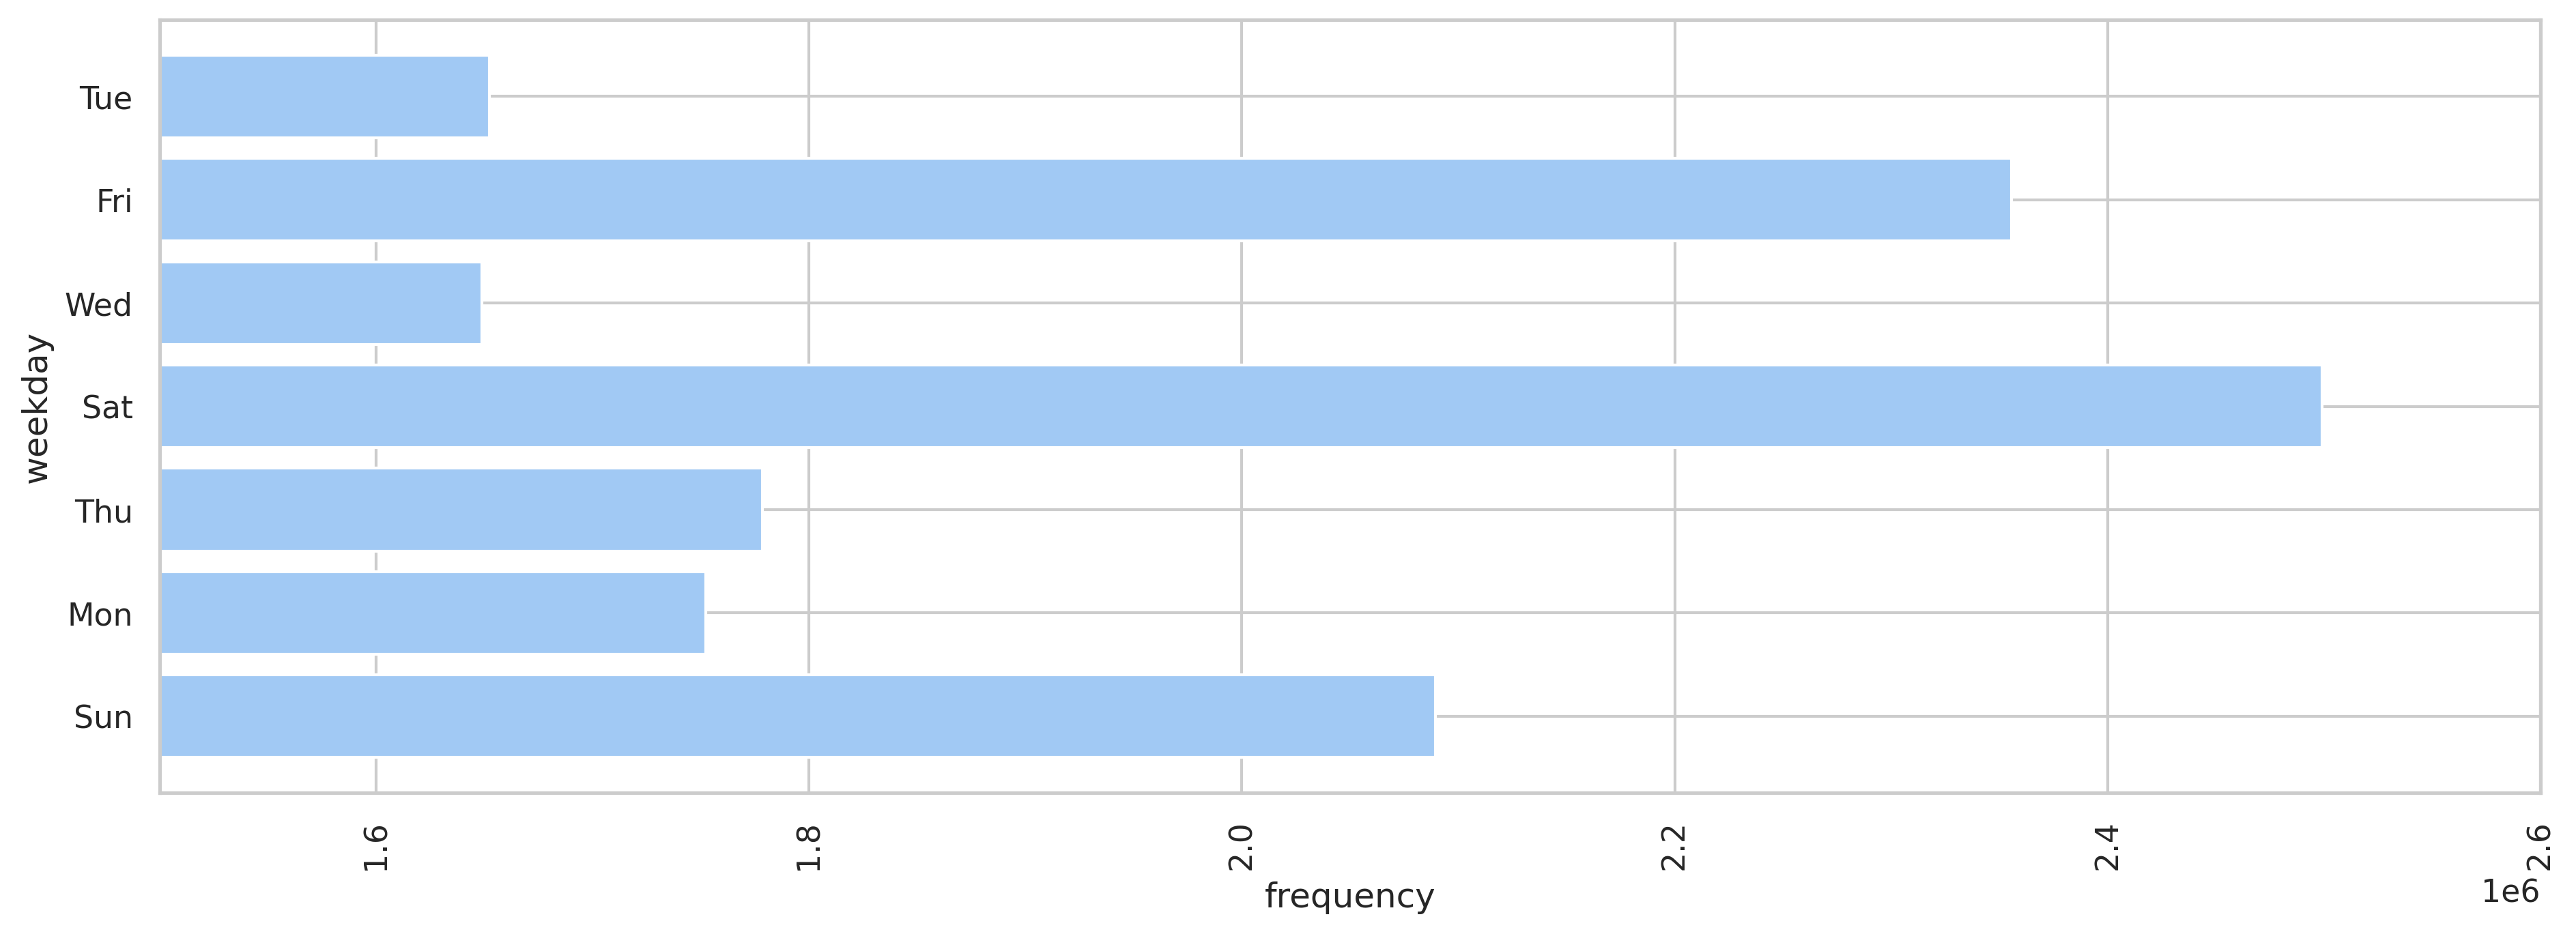

In [12]:
sql_script = \
"""
    SELECT 
        day_name,
        COUNT(day_name) AS count
    FROM session_insight
    GROUP BY day_name
"""

day_name = spark.sql(sql_script).toPandas()

plt.figure(figsize=(15,5), dpi=300)
plt.barh(day_name['day_name'],day_name['count'])
plt.xlabel('frequency')
plt.ylabel('weekday')
plt.xlim([1.5e6,2.6e6])
plt.xticks(rotation=90)
plt.show()

del day_name

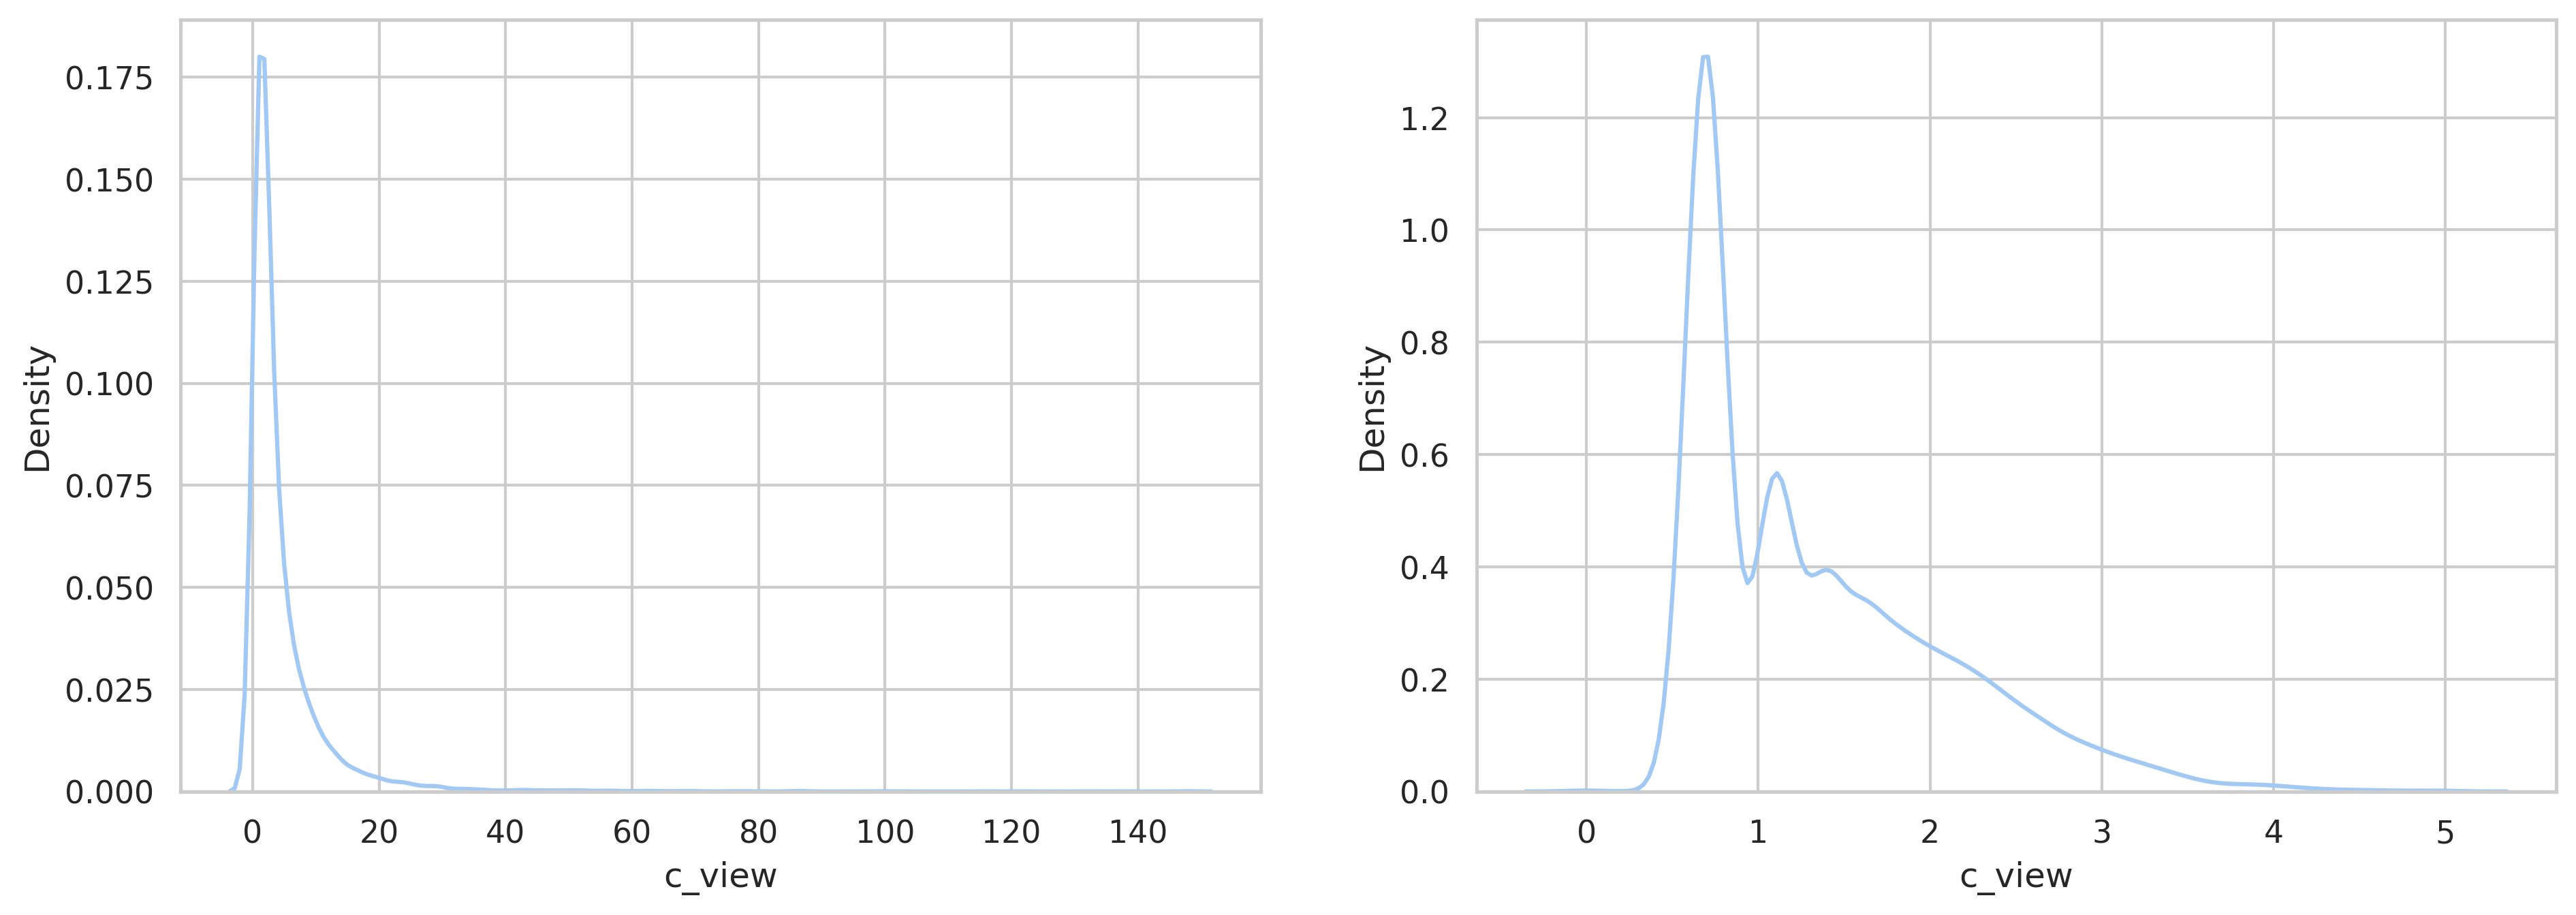

In [13]:
sql_script = \
"""
    SELECT c_view 
    FROM session_insight
    ORDER BY RAND()
    LIMIT 10000
"""

c_view = spark.sql(sql_script).toPandas()

plt.figure(figsize=(15,5), dpi=300)

plt.subplot(1,2,1)
sns.kdeplot(c_view['c_view'])

plt.subplot(1,2,2)
sns.kdeplot(np.log(c_view['c_view']+1))

plt.show()

del c_view

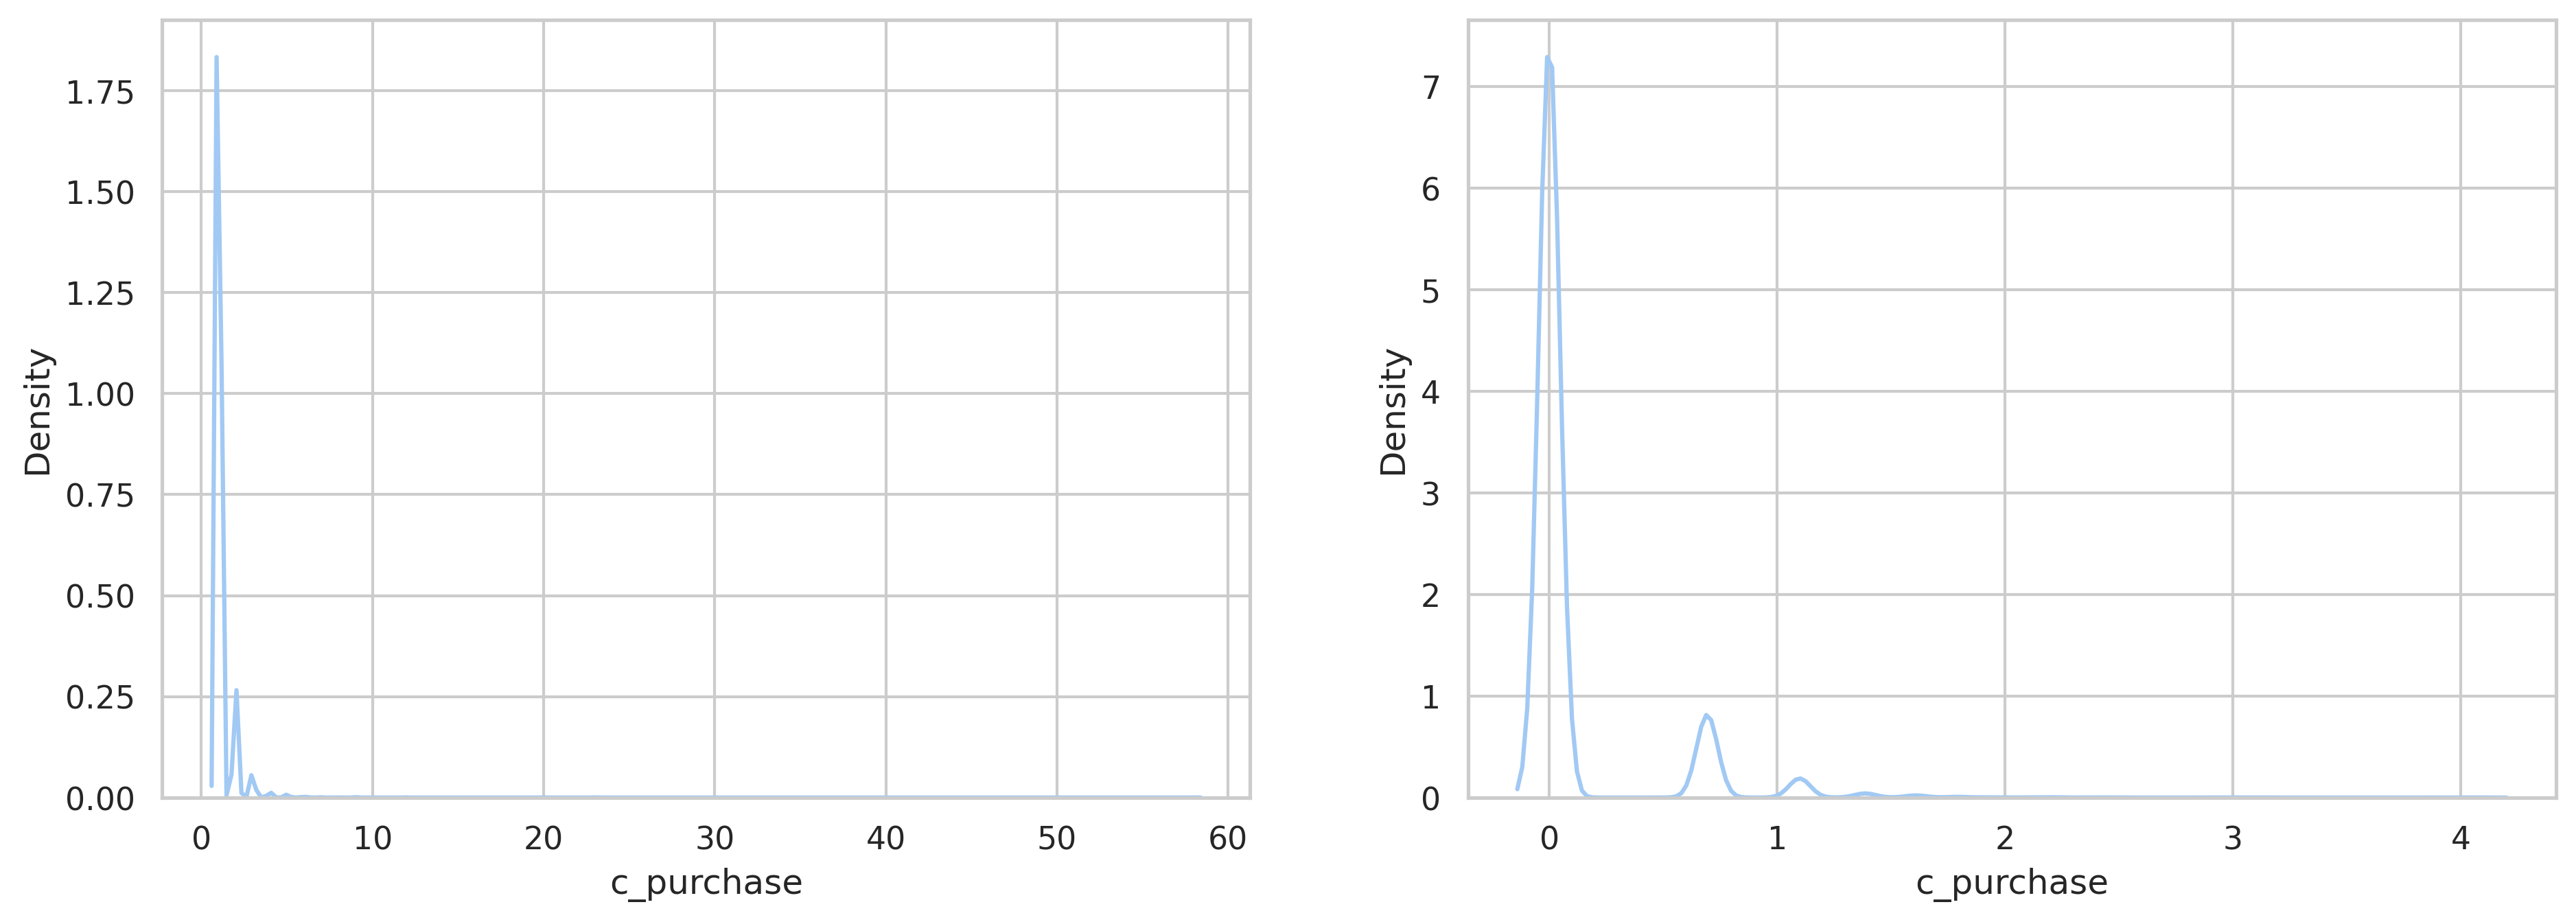

In [14]:
sql_script = \
"""
    SELECT c_purchase 
    FROM session_insight
    WHERE c_purchase <> 0
    ORDER BY RAND()
    LIMIT 10000
"""

c_purchase = spark.sql(sql_script).toPandas()

plt.figure(figsize=(15,5), dpi=300)

plt.subplot(1,2,1)
sns.kdeplot(c_purchase['c_purchase'])

plt.subplot(1,2,2)
sns.kdeplot(np.log(c_purchase['c_purchase']))

plt.show()

del c_purchase

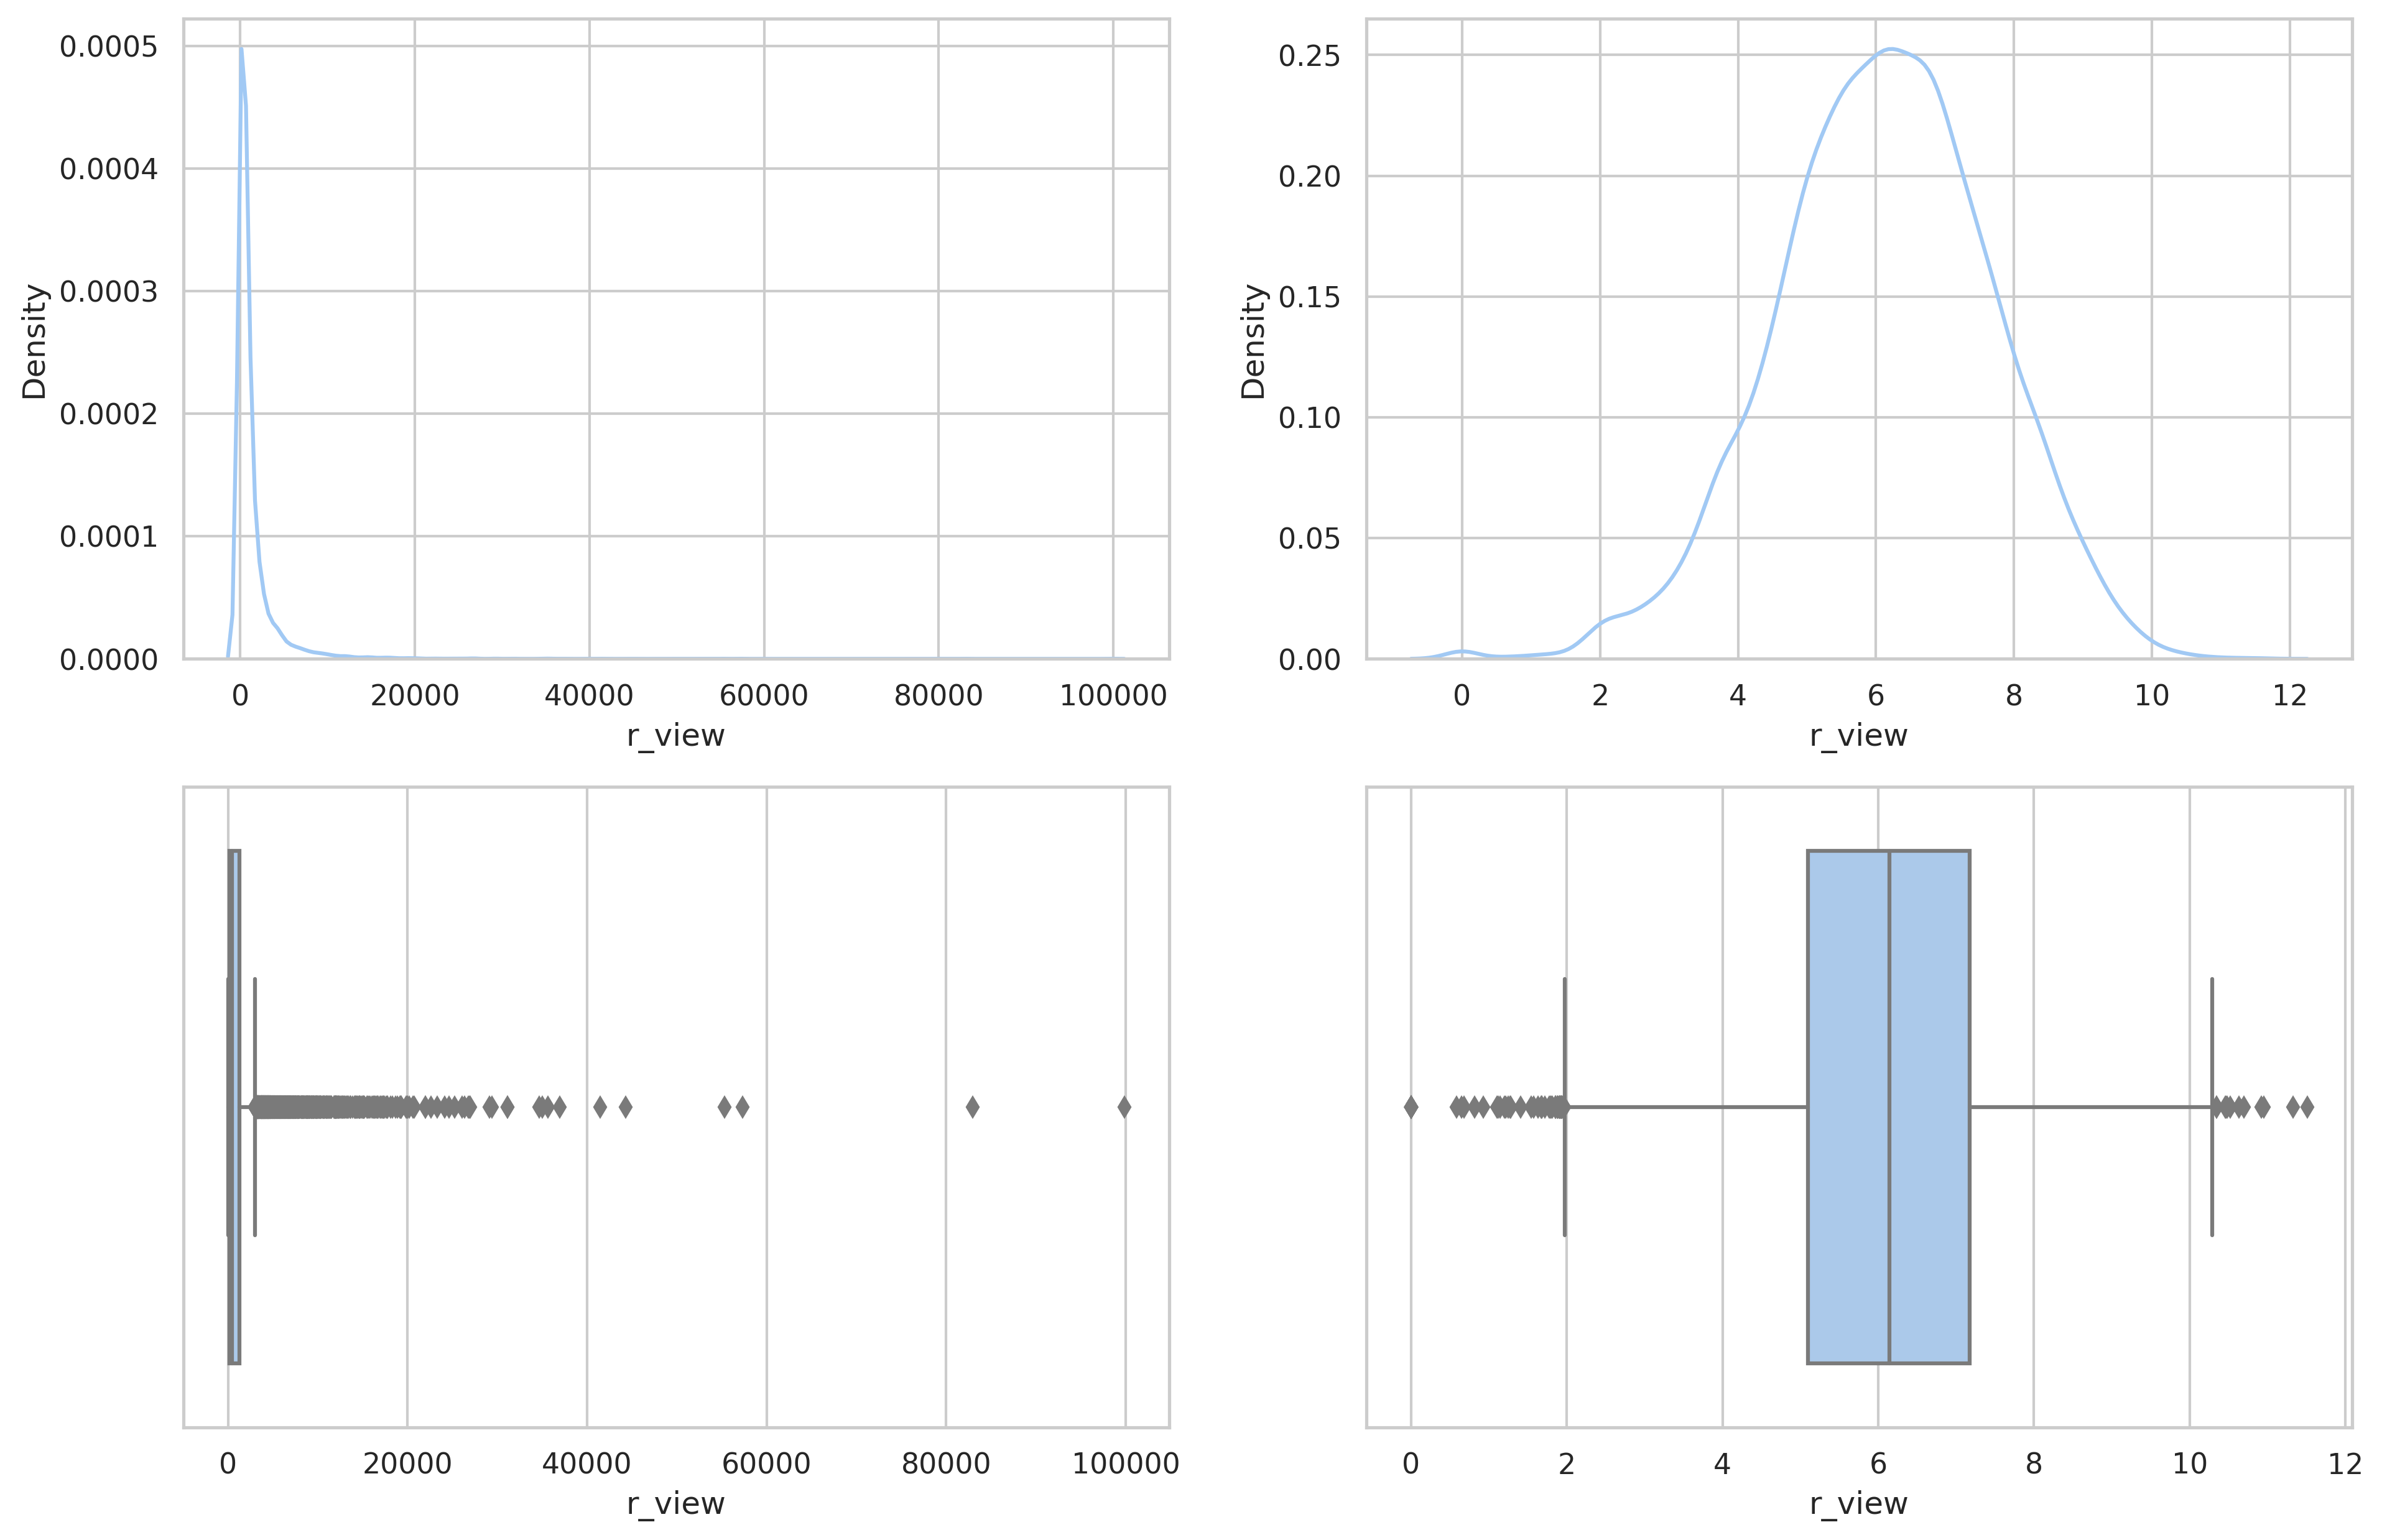

In [15]:
sql_script = \
"""
    SELECT r_view 
    FROM session_insight
    ORDER BY RAND()
    LIMIT 10000
"""

r_view = spark.sql(sql_script).toPandas()

plt.figure(figsize=(15,10), dpi=300)

plt.subplot(2,2,1)
sns.kdeplot(x=r_view['r_view'])

plt.subplot(2,2,2)
sns.kdeplot(x=np.log(r_view['r_view']+1))

plt.subplot(2,2,3)
sns.boxplot(x=r_view['r_view'])

plt.subplot(2,2,4)
sns.boxplot(x=np.log(r_view['r_view']+1))

plt.show()

del r_view

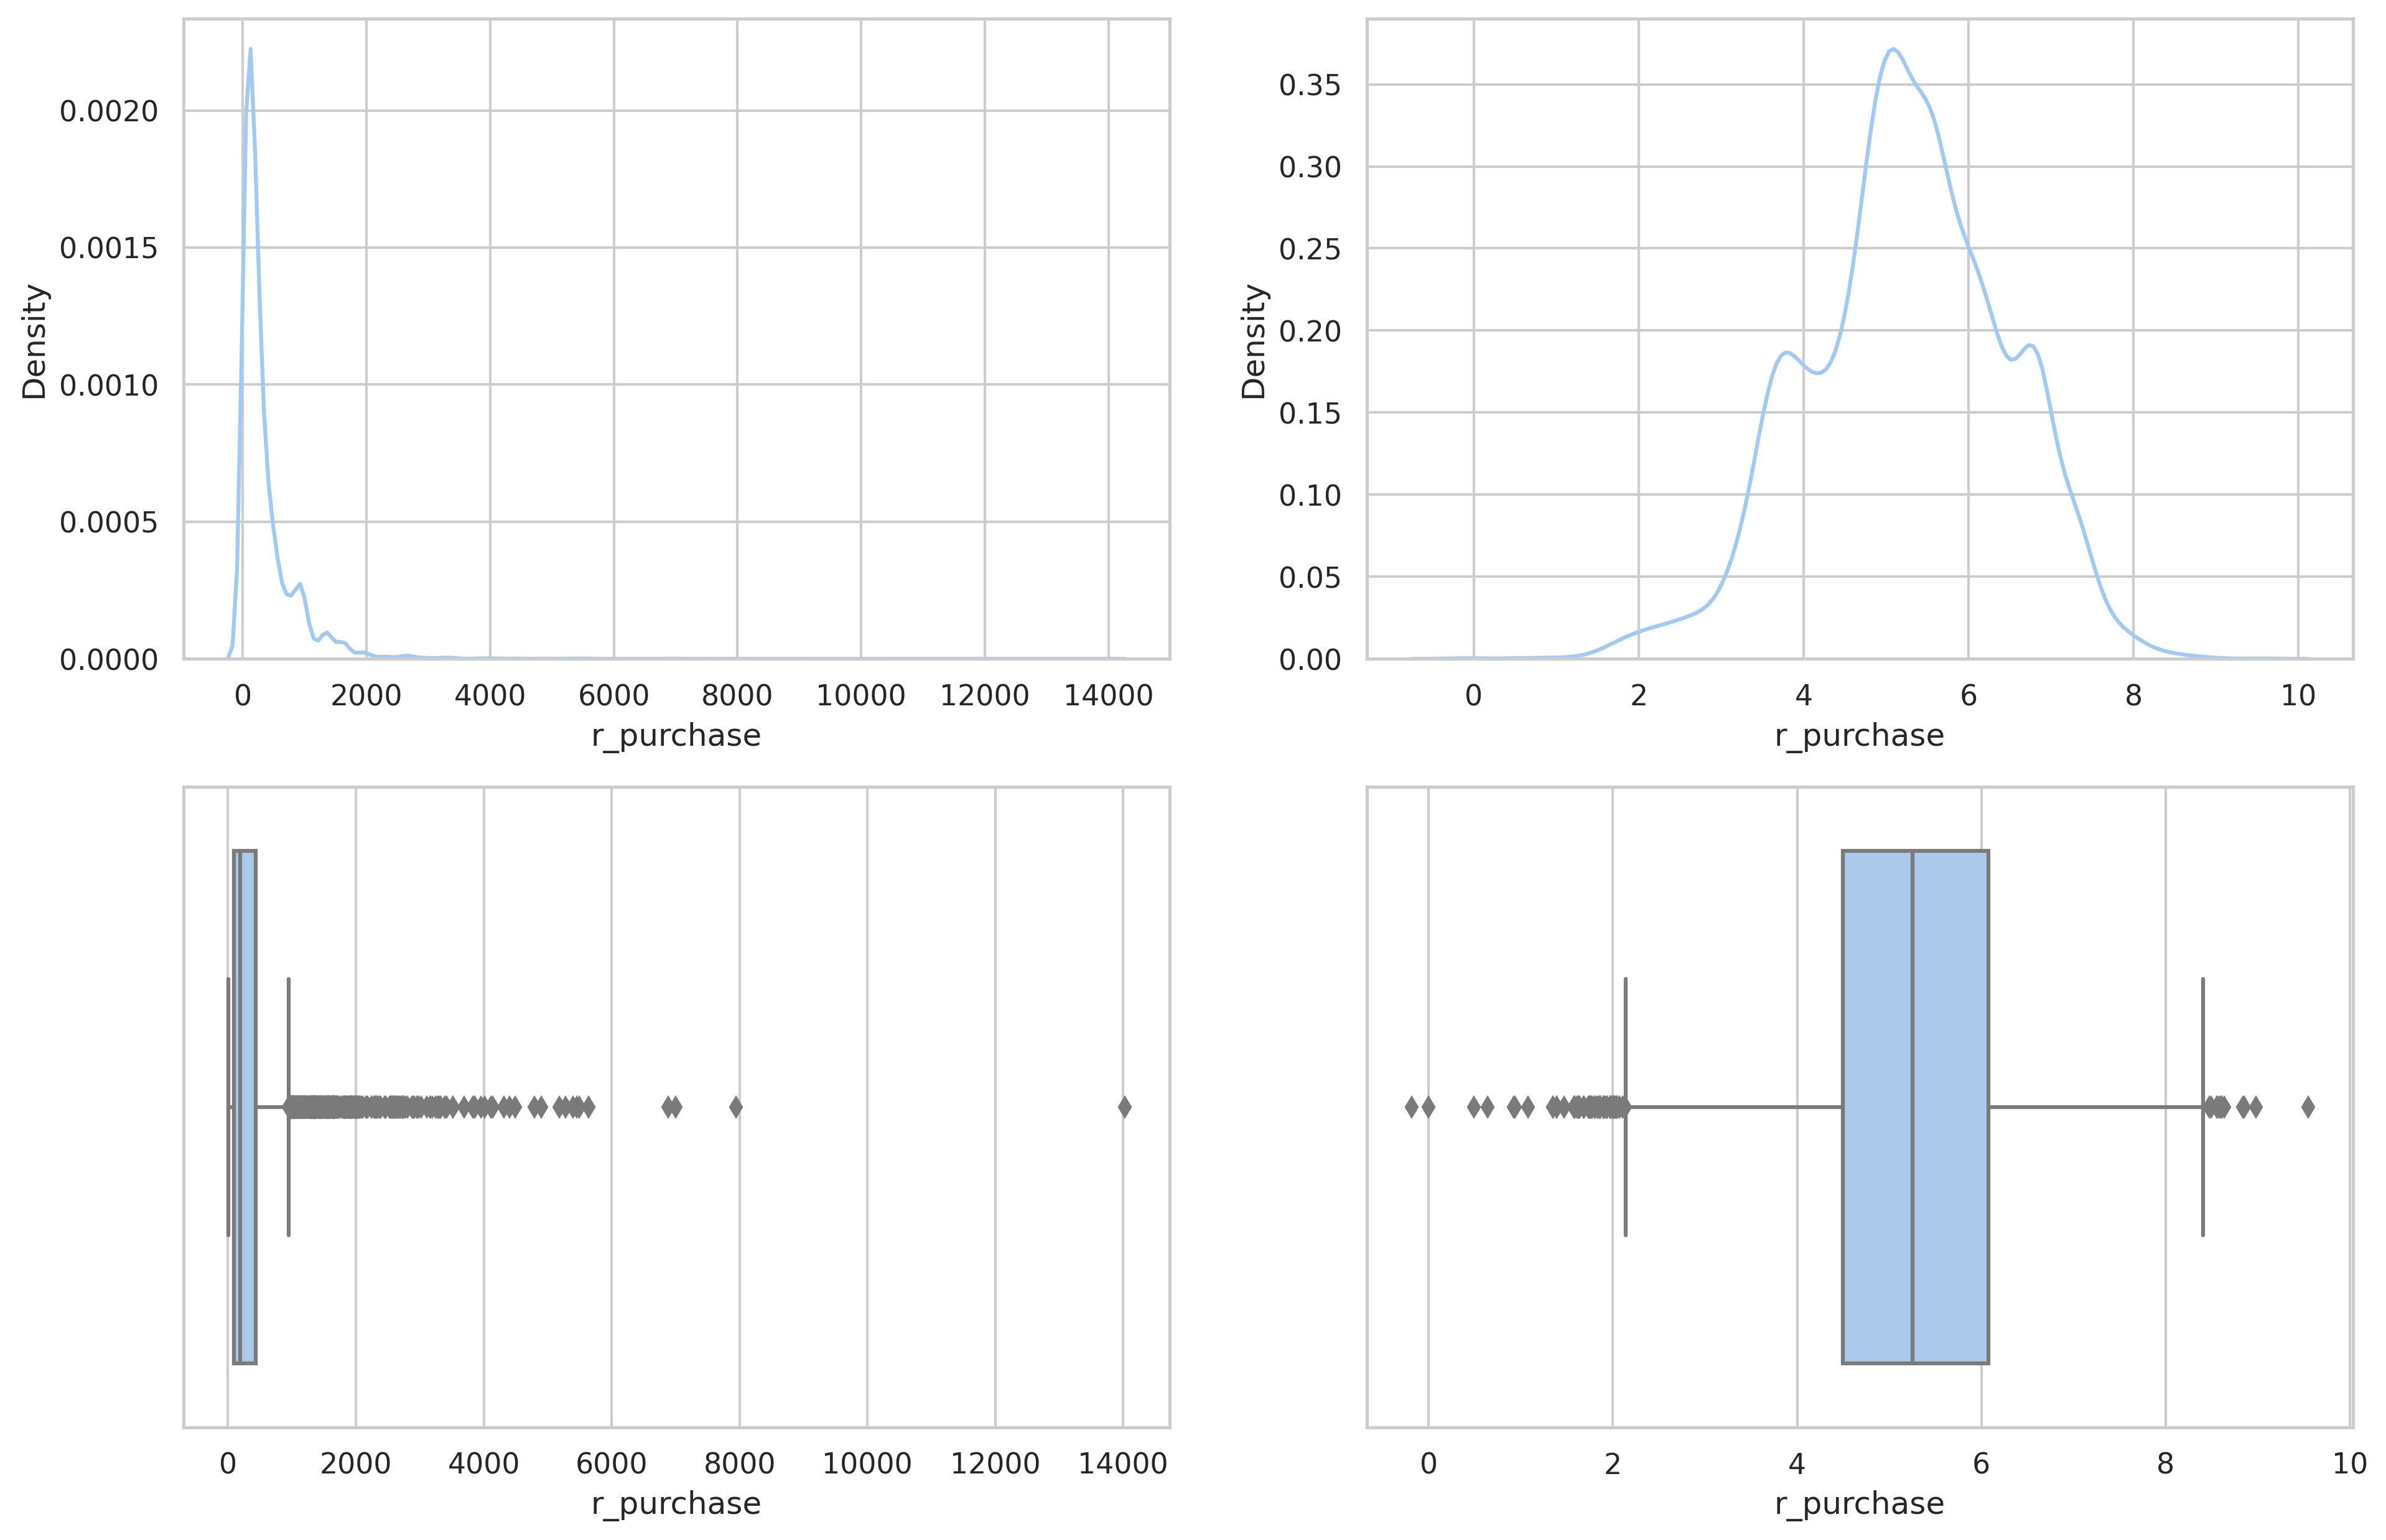

In [16]:
sql_script = \
"""
    SELECT r_purchase 
    FROM session_insight
    WHERE r_purchase <> 0
    ORDER BY RAND()
    LIMIT 10000
"""

r_purchase = spark.sql(sql_script).toPandas()

plt.figure(figsize=(15,10), dpi=300)

plt.subplot(2,2,1)
sns.kdeplot(x=r_purchase['r_purchase'])

plt.subplot(2,2,2)
sns.kdeplot(x=np.log(r_purchase['r_purchase']))

plt.subplot(2,2,3)
sns.boxplot(x=r_purchase['r_purchase'])

plt.subplot(2,2,4)
sns.boxplot(x=np.log(r_purchase['r_purchase']))

plt.show()

del r_purchase

<Figure size 3000x3000 with 0 Axes>

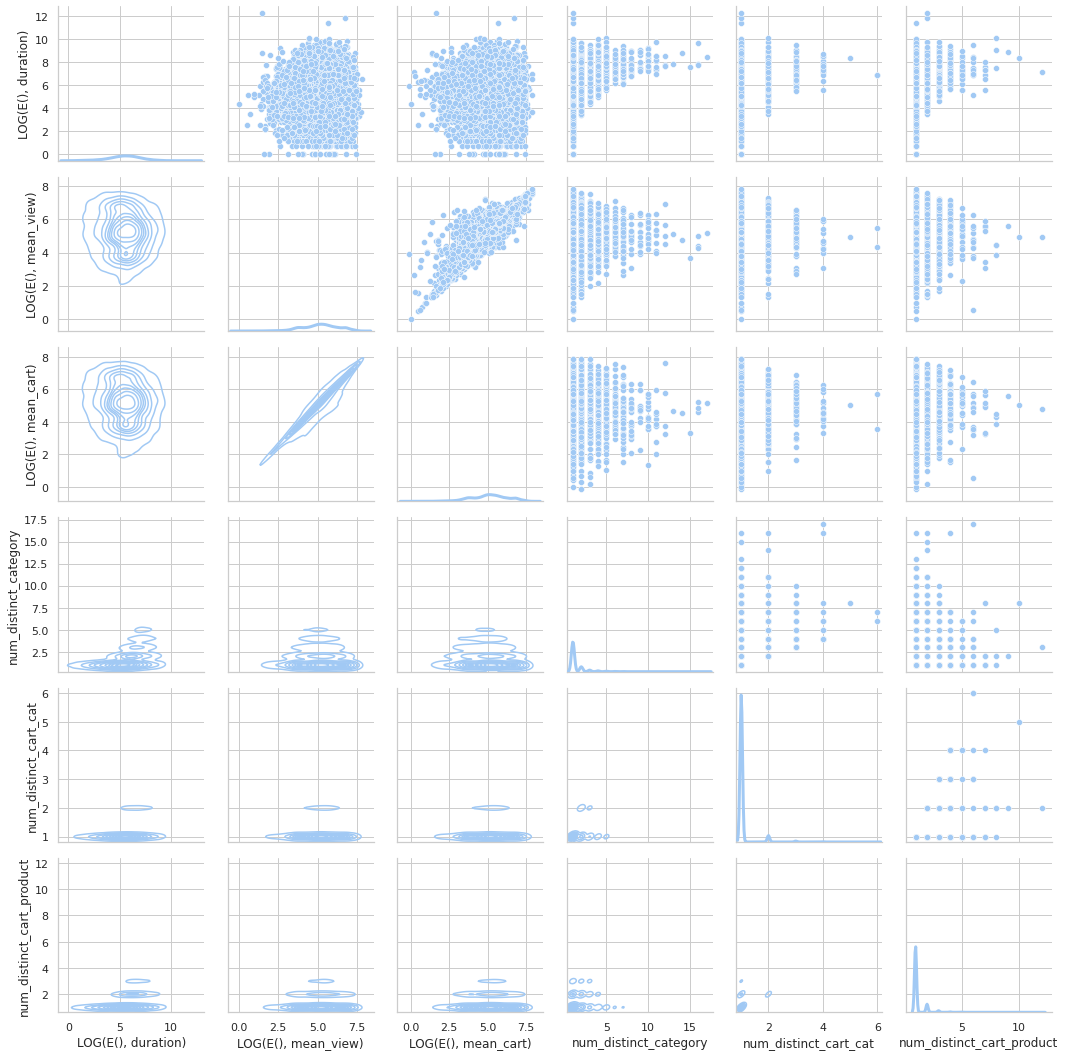

In [10]:
sql_script = \
"""
    SELECT 
        LOG(duration),
        LOG(mean_view),
        LOG(mean_cart),
        num_distinct_category,
        num_distinct_cart_cat,
        num_distinct_cart_product
    FROM session_insight
    WHERE c_cart <> 0
    ORDER BY RAND()
    LIMIT 10000
"""

subtab = spark.sql(sql_script).toPandas()

plt.figure(figsize=(6,6), dpi=500)
g = sns.PairGrid(subtab)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)